# Taller 3: Operaciones Morfológicas

Para este taller vamos a implementar las operaciones de erosion, dilatación y haremos un algoritmo de detección de bordes y de relleno.

Para este taller deben buscar una imagen binaria que tenga agujeros (Regiones de un valor binario rodeadas de otro valor binario)

Para este taller deben:

1. Implementar el algortimo de erosión.
2. Probar este algortimo de erosión con mascaras de diferente tamaño y forma. ¿Qué concluyen?
3. Implementar el algoritmo de dilatación.
4. Probar este algortimo de dilatación con mascaras de diferente tamaño y forma. ¿Qué concluyen?
5. Implementar un algoritmo de detección de borde. Este algortimo debe permitir seleccionar un tipo de mascara la cual se utilizara tanto en las operaciones de erosión y dilatación necesarias.
6. Pruebe el algoritmo con diferentes mascaras. ¿Aué concluye?
7. Implemente un algoritmo de relleno de ahujeros.
8. Pruebe el algoritmo con diferentes mascaras de erosión/dilatación. ¿Qué concluye? (Lleve track del número de iteraciones realizadas)

Este taller lo deben entregar el próximo **Lunes 14 de Marzo, 2022 a las 11:59 p.m.**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# apt-get update && apt-get install -y python3-opencv
# pip install opencv-python

In [2]:
def dilation(im, B):
    """
    Efetua la operacion de dilatacion sobre una imagen binaria
    (dilata los negros)
    Arguments:
        im = Imagen binaria (en blanco y negro)
        B = kernel (structuring element)
    Return imagen dilatada
    """
    im = np.abs(1-im) # cambiamos blancos y negros (negativo)

    B = cv2.flip(B,-1)
    im = cv2.filter2D(src=im, ddepth= -1, kernel=B)
    im[im>=1] = 1
    
    im = np.abs(1-im) # cambiamos blancos y negros 
                      # regresamos a la imagen original
    
    return im

In [3]:
im2 = cv2.imread('awa.png')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
im2_th = cv2.threshold(im2, 128, 255, cv2.THRESH_BINARY)[1]
im2_th_bin = im2_th/255

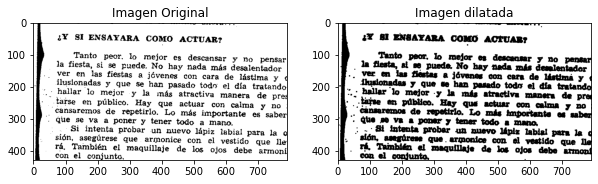

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

B = np.ones((3,3))

im = dilation(im2_th_bin, B)
ax1.imshow(im2_th_bin, cmap='gray')
ax1.set_title('Imagen Original')
ax2.imshow(im*255, cmap='gray')
ax2.set_title('Imagen dilatada');

In [54]:
def filling(im, X0, B, ntimes = 100):
    
    X_temp = X0 
    
    #imagen complemento
    im_comp = np.abs(1-im)
    
    #and entrada a entrada
    Xk = np.multiply(dilation(np.abs(1-X_temp), B), im_comp )
    k = 1
    
    plt.imshow(Xk*255)
    
    while k < ntimes:#(not np.array_equal(X_temp, Xk)):
                
        #dado que la función dilatation dilata los negros
        #y aquí queremos dilatar los blancos (el seed que creamos)
        #entonces dilatamos el complemento de nuestro seed x_temp
        X_temp_dil = dilation(np.abs(1-X_temp), B) 
        
        # recuerde que dado que dilatamos el complemento de la imagen
        # nos será retornado el complemento de la imagen dilatado
        # por ello hace falta volverle a sacar el complemento
        X_temp_dil = np.abs(1 - X_temp_dil)
        
        # intersección con imagen complemento
        # recuerde que acá queremos 
        Xk = np.multiply(X_temp_dil, im_comp)
        
        #guardo denuevo y sigo iteratando
        # sobre el Xk que debería haberse expandido
        X_temp = Xk
        k += 1
        
    return (Xk+im), k

In [33]:
im4 = cv2.imread('filling.PNG')
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2GRAY)
im4_th = cv2.threshold(im4, 128, 255, cv2.THRESH_BINARY)[1]
im4_th_bin = im4_th/255


Text(0.5, 1.0, 'Intersección entre la máscara y la imagen binaria')

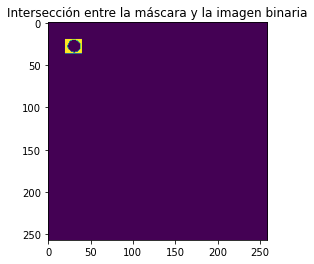

In [56]:
B = np.array([[0,1,0],
              [1,1,1],
              [0,1,0]])

X0 = np.zeros(im4.shape)
a = 20 
b = 37
c = 20 
d = 40
X0[a:b, c:d] = 1

plt.imshow(np.multiply(X0, im4_th_bin)*255)
plt.title("Intersección entre la máscara y la imagen binaria")

100


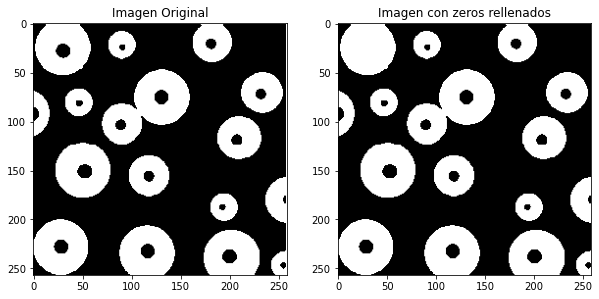

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

X0 = np.zeros(im4.shape)

mid_row = int((a+b)/2)
mid_col = int((c+d)/2)
X0[mid_row-3:mid_row+3, mid_col-3:mid_col+3] = 1


im, k = filling(im4_th_bin, X0, B, ntimes=100)
print(k)
ax1.imshow(im4_th_bin, cmap='gray')
ax1.set_title('Imagen Original')
ax2.imshow(im*255, cmap='gray')
ax2.set_title('Imagen con zeros rellenados');